In [2]:
import ptitprince as pt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### (Test) All Categories

In [3]:
data = pd.read_csv('topics-post-RADAR-data.csv')

columns_to_keep = ['STUD_REFORMATTED', 'STUD_RED_RADAR','STUD_ALL_RADAR', 'GPT3_RADAR', 'GPT4_RADAR', 'GPT4_Quillbot_RADAR',
                   'GPT4_Grammarly_RADAR', 'GPT4_WordAI_RADAR','GPT4_Paraphrasing_IO_RAW_RADAR', 'GPT4_Paraphrasing_IO_EDITED_RADAR']

melted_data = data[columns_to_keep]

melted_data = pd.melt(melted_data, var_name='Category', value_name='RADAR_output')

<Axes: xlabel='RADAR_output', ylabel='Category'>

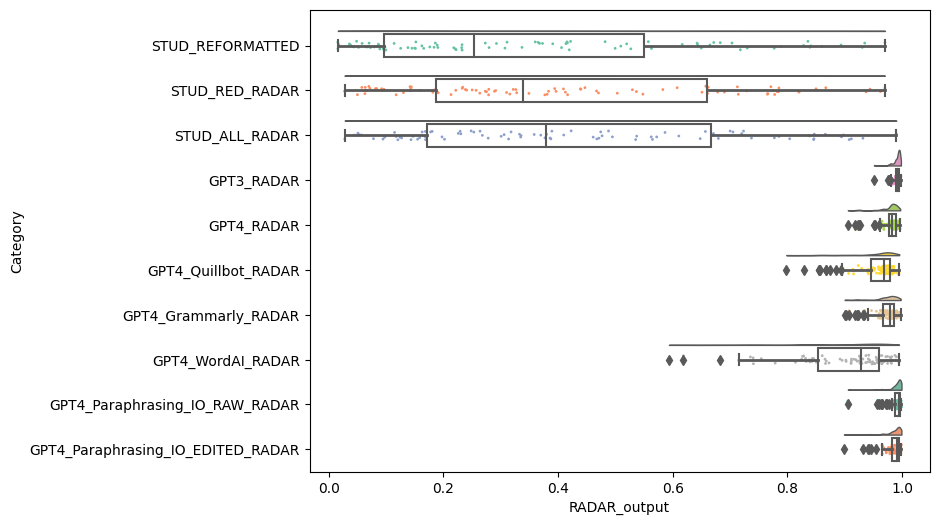

In [4]:
f, ax = plt.subplots(figsize=(8, 6))
pt.RainCloud(data = melted_data, x = 'Category', y = 'RADAR_output', ax = ax, orient='h', point_size=2, width_box=0.5)

<Axes: xlabel='Category', ylabel='RADAR_output'>

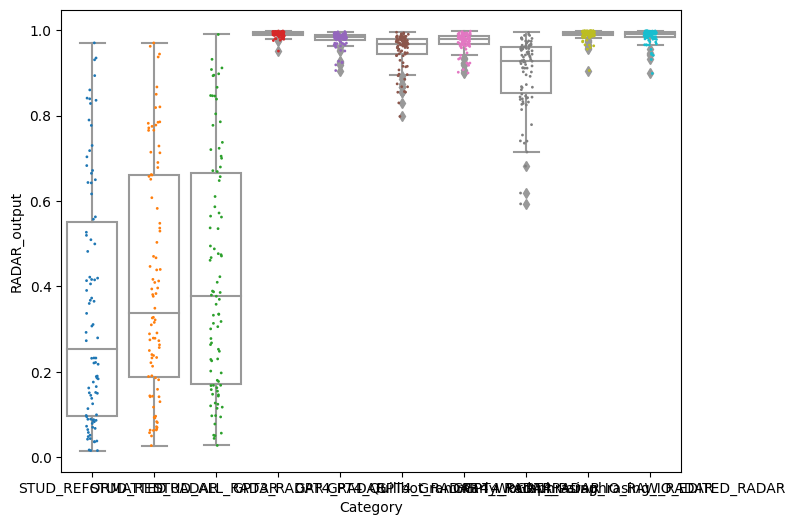

In [5]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(data=melted_data, x = 'Category', y = 'RADAR_output', size=2)
sns.boxplot(data=melted_data, x = 'Category', y = 'RADAR_output', color='White')

#### Raw HWT vs MGTs

[[Text(0, 0, 'Human'), Text(1, 0, 'GPT3'), Text(2, 0, 'GPT4')]]

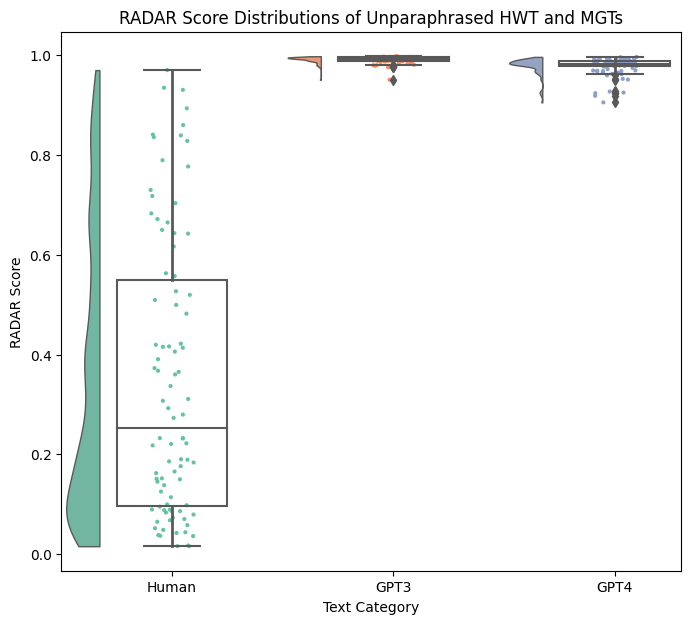

In [22]:
data = pd.read_csv('topics-post-RADAR-data.csv')
columns_to_keep = ['STUD_REFORMATTED', 'GPT3_RADAR', 'GPT4_RADAR']
melted_data = data[columns_to_keep]
melted_data = pd.melt(melted_data, var_name='Category', value_name='RADAR_output')
f, ax = plt.subplots(figsize=(8, 7))
g = pt.RainCloud(data = melted_data, x = 'Category', y = 'RADAR_output', ax = ax, orient='v', point_size=3, 
             width_box= .5, width_viol= .3, scale='count')
plt.xlabel('Text Category')
plt.ylabel('RADAR Score')
plt.title('RADAR Score Distributions of Unparaphrased HWT and MGTs')
g.set(xticklabels=['Human','GPT3', 'GPT4'])

/home/nicole/TOPICS/RADAR/rainCloudEnv/lib/python3.8/site-packages/seaborn/axisgrid.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)


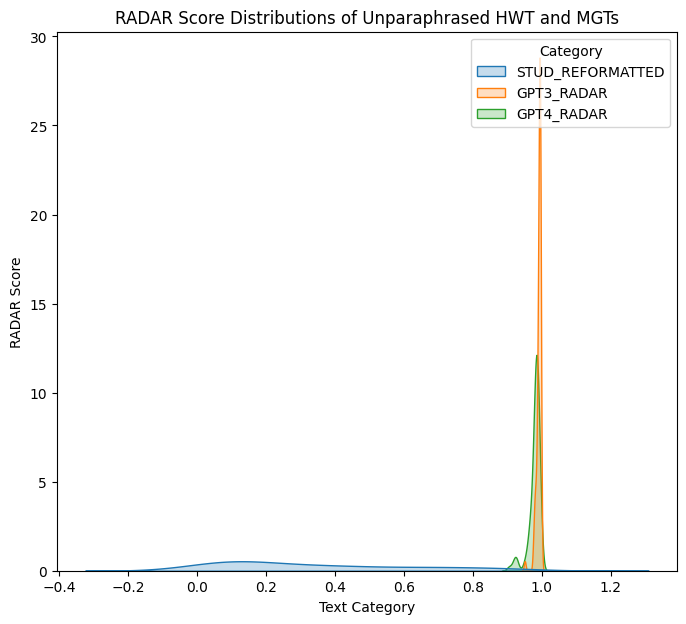

In [39]:
data = pd.read_csv('topics-post-RADAR-data.csv')
columns_to_keep = ['STUD_REFORMATTED', 'GPT3_RADAR', 'GPT4_RADAR']
melted_data = data[columns_to_keep]
melted_data = pd.melt(melted_data, var_name='Category', value_name='RADAR_output')
f, ax = plt.subplots(figsize=(8, 7))
sns.kdeplot(data = melted_data, hue = 'Category', x = 'RADAR_output', fill=True)
plt.xlabel('Text Category')
plt.ylabel('RADAR Score')
plt.title('RADAR Score Distributions of Unparaphrased HWT and MGTs')
g.set(xticklabels=['Human','GPT3', 'GPT4'])

In [85]:
data['STUD_REFORMATTED']
test = {
    'RADAR_threshold' : [x / 100 for x in range(101)],
    'HWT_FP' : [(data['STUD_REFORMATTED'] > (x / 100)).sum() / 90 * 100 for x in range(101)],
    'GPT4_FN' : [(data['GPT4_RADAR'] < (x / 100)).sum() / 90 * 100 for x in range(101)],
    'GPT3_FN' : [(data['GPT3_RADAR'] < (x / 100)).sum() / 90 * 100 for x in range(101)],
    'WordAI_FN' : [(data['GPT4_WordAI_RADAR'] < (x / 100)).sum() / 90 * 100 for x in range(101)]
}

df = pd.DataFrame(test)
melted = pd.melt(df, id_vars=['RADAR_threshold'])

In [86]:
df.tail(21)

,RADAR_threshold,HWT_FP,GPT4_FN,GPT3_FN,WordAI_FN
80,0.80,10.000000,0.000000,0.000000,10.000000
81,0.81,10.000000,0.000000,0.000000,10.000000
82,0.82,10.000000,0.000000,0.000000,11.111111
83,0.83,8.888889,0.000000,0.000000,14.444444
84,0.84,6.666667,0.000000,0.000000,18.888889
85,0.85,5.555556,0.000000,0.000000,24.444444
86,0.86,4.444444,0.000000,0.000000,25.555556
87,0.87,4.444444,0.000000,0.000000,30.000000
88,0.88,4.444444,0.000000,0.000000,31.111111
89,0.89,4.444444,0.000000,0.000000,31.111111


(0.0, 100.0)

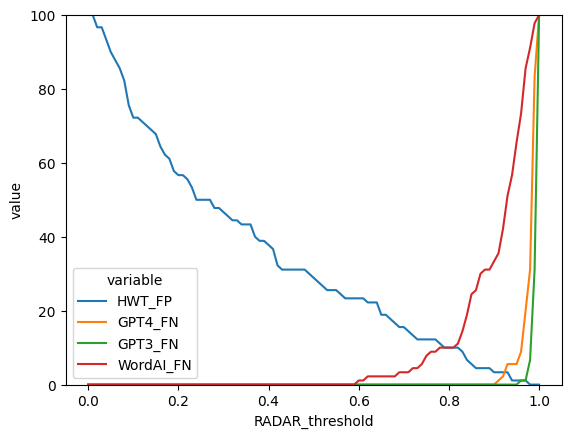

In [81]:
sns.lineplot(data=melted, x='RADAR_threshold', y = 'value', hue='variable')
plt.ylim(0,100)

#### Paraphrased MGTs

(0.0, 1.0)

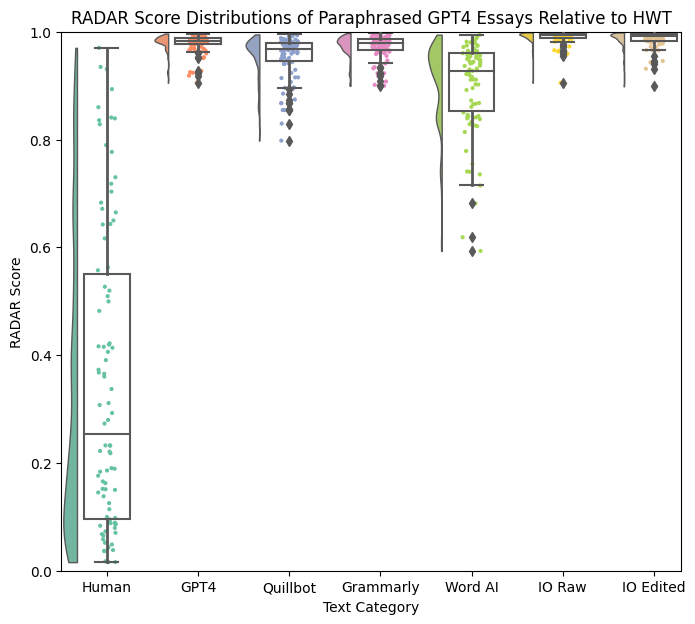

In [24]:
data = pd.read_csv('topics-post-RADAR-data.csv')
columns_to_keep = ['STUD_REFORMATTED','GPT4_RADAR', 'GPT4_Quillbot_RADAR','GPT4_Grammarly_RADAR', 'GPT4_WordAI_RADAR',
                   'GPT4_Paraphrasing_IO_RAW_RADAR', 'GPT4_Paraphrasing_IO_EDITED_RADAR']
melted_data = data[columns_to_keep]
melted_data = pd.melt(melted_data, var_name='Category', value_name='RADAR_output')
f, ax = plt.subplots(figsize=(8, 7))
g = pt.RainCloud(data = melted_data, x = 'Category', y = 'RADAR_output', ax = ax, orient='v', point_size=3, 
             width_box= .5, width_viol= .3, scale='count')
plt.xlabel('Text Category')
plt.ylabel('RADAR Score')
plt.title('RADAR Score Distributions of Paraphrased GPT4 Essays Relative to HWT')
g.set(xticklabels=['Human','GPT4', 'Quillbot', 'Grammarly', 'Word AI', 'IO Raw', 'IO Edited'])
plt.ylim(0,1)

/home/nicole/TOPICS/RADAR/rainCloudEnv/lib/python3.8/site-packages/seaborn/axisgrid.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)


(0.0, 1.0)

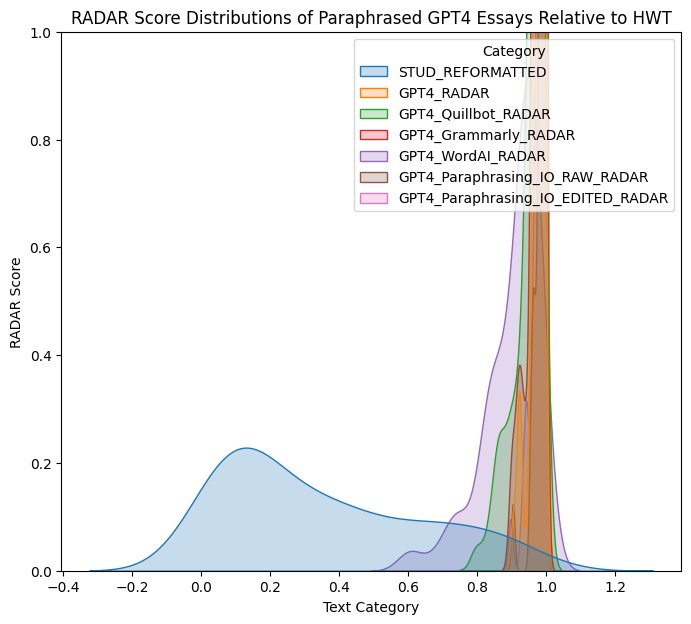

In [40]:
data = pd.read_csv('topics-post-RADAR-data.csv')
columns_to_keep = ['STUD_REFORMATTED','GPT4_RADAR', 'GPT4_Quillbot_RADAR','GPT4_Grammarly_RADAR', 'GPT4_WordAI_RADAR',
                   'GPT4_Paraphrasing_IO_RAW_RADAR', 'GPT4_Paraphrasing_IO_EDITED_RADAR']
melted_data = data[columns_to_keep]
melted_data = pd.melt(melted_data, var_name='Category', value_name='RADAR_output')
f, ax = plt.subplots(figsize=(8, 7))
sns.kdeplot(data = melted_data, hue = 'Category', x = 'RADAR_output', fill=True)
plt.xlabel('Text Category')
plt.ylabel('RADAR Score')
plt.title('RADAR Score Distributions of Paraphrased GPT4 Essays Relative to HWT')
g.set(xticklabels=['Human','GPT4', 'Quillbot', 'Grammarly', 'Word AI', 'IO Raw', 'IO Edited'])
plt.ylim(0,1)

#### Paraphrased HWT

(0.0, 1.0)

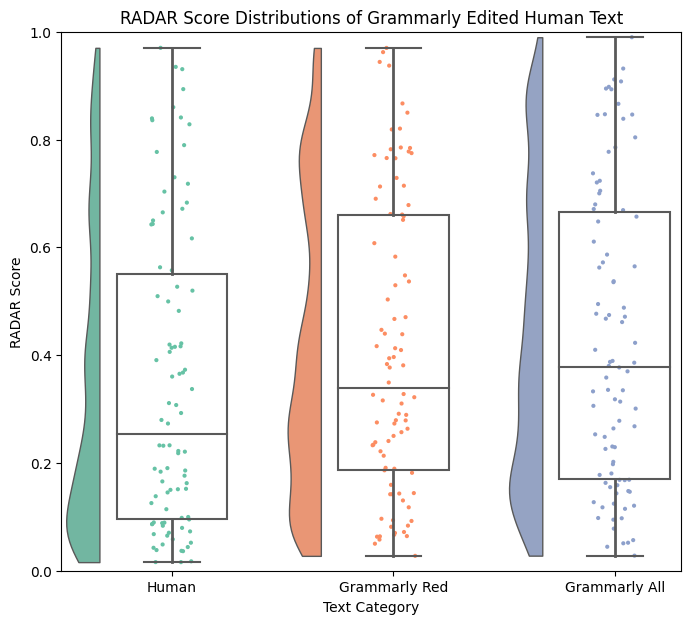

In [25]:
data = pd.read_csv('topics-post-RADAR-data.csv')
columns_to_keep = ['STUD_REFORMATTED','STUD_RED_RADAR','STUD_ALL_RADAR']
melted_data = data[columns_to_keep]
melted_data = pd.melt(melted_data, var_name='Category', value_name='RADAR_output')
f, ax = plt.subplots(figsize=(8, 7))
g = pt.RainCloud(data = melted_data, x = 'Category', y = 'RADAR_output', ax = ax, orient='v', point_size=3, 
             width_box= .5, width_viol= .3, scale='count')
plt.xlabel('Text Category')
plt.ylabel('RADAR Score')
plt.title('RADAR Score Distributions of Grammarly Edited Human Text')
g.set(xticklabels=['Human','Grammarly Red', 'Grammarly All'])
plt.ylim(0,1)